In [18]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [6]:
columns = ['Beer ID','Brewery', 'Beer name', 'Beer Style', 'Beer Description', 'ABV', 'IBU', 'No Raters', 'Rating', 'Date Added']

df = pd.read_csv(r'/Users/Nic/Documents/Python/beers scraped backup/Beer project/All Beers.csv', header=None, names=columns)

df.drop_duplicates(subset=['Beer ID','Brewery', 'Beer name', 'Beer Style', 'Beer Description', 'ABV', 'IBU', 'No Raters', 'Rating', 'Date Added'], keep='last', inplace=True)

df=df.replace(' N/A  ',np.nan)
df=df.replace('  N/A ',np.nan)

#change values to numeric and if there is an error such as numeric + text eg.'1 Rating' coerce it into NaN
df[['ABV','IBU','No Raters','Rating']] = df[['ABV','IBU','No Raters','Rating']].apply(pd.to_numeric, errors='coerce')

df.head()

,Beer ID,Brewery,Beer name,Beer Style,Beer Description,ABV,IBU,No Raters,Rating,Date Added
0,1649744,Juguetes Perdidos,Jamaica Dubbel,Belgian Dubbel,Clásica Dubbel de Abadía con adición de granos...,7.0,19.0,72.0,4.10,07/17/16
1,1967868,Juguetes Perdidos,Saison Maracuyá,Saison / Farmhouse Ale,Maracuyá / Passion Fruit Infused Read Less,7.0,19.0,57.0,3.93,02/25/17
2,1809101,Juguetes Perdidos,Imperial Saison Chardonnay Barrel,Saison / Farmhouse Ale,"Spiced Saison, High Gravity, aged in white win...",11.7,25.0,60.0,3.76,11/05/16
3,1277658,Juguetes Perdidos,Good Bye Lenin! - Baltic Porter,Porter - Baltic,"Chocolate, café y un tenor alcohólico importan...",9.0,25.0,52.0,3.99,10/17/15
4,1227273,Juguetes Perdidos,Hop de Lis - Belgian IPA,IPA - Belgian,American IPA fermentada con levadura Belga Rea...,6.6,66.0,47.0,4.25,09/06/15


In [7]:
df1 = df.copy() #make a copy of the dataset
df1.reset_index(drop = True, inplace = True) #reset index
df1['Brewery'] = df1['Brewery'].str.strip()# removed whitespaces that prevented from joining

#Create 2 new empty columns for type and subtype
df1['Type'] = ''
df1['Subtype'] = ''

error_split = [] #empty list to later identify if there are any error in the loop

In [8]:
#need to split type and subtype
for i in df1.index:
    spec = df1.at[i, 'Beer Style'].split(' - ') 
    length = len(spec)
    if length == 1: #if no splitting has happened then put the string in its position in column 'Type'
        [df1.at[i, 'Type']] = spec
    elif length == 2: #if it has been split then assign the 2 new strings to the 2 newly created columns
        [df1.at[i, 'Type'], df1.at[i, 'Subtype']] = spec
    else:
        error_split.append(i)
print(error_split)#check if there has been any error where none of those operations have been executed. should return an empty list

df1.head()

[]


,Beer ID,Brewery,Beer name,Beer Style,Beer Description,ABV,IBU,No Raters,Rating,Date Added,Type,Subtype
0,1649744,Juguetes Perdidos,Jamaica Dubbel,Belgian Dubbel,Clásica Dubbel de Abadía con adición de granos...,7.0,19.0,72.0,4.10,07/17/16,Belgian Dubbel,
1,1967868,Juguetes Perdidos,Saison Maracuyá,Saison / Farmhouse Ale,Maracuyá / Passion Fruit Infused Read Less,7.0,19.0,57.0,3.93,02/25/17,Saison / Farmhouse Ale,
2,1809101,Juguetes Perdidos,Imperial Saison Chardonnay Barrel,Saison / Farmhouse Ale,"Spiced Saison, High Gravity, aged in white win...",11.7,25.0,60.0,3.76,11/05/16,Saison / Farmhouse Ale,
3,1277658,Juguetes Perdidos,Good Bye Lenin! - Baltic Porter,Porter - Baltic,"Chocolate, café y un tenor alcohólico importan...",9.0,25.0,52.0,3.99,10/17/15,Porter,Baltic
4,1227273,Juguetes Perdidos,Hop de Lis - Belgian IPA,IPA - Belgian,American IPA fermentada con levadura Belga Rea...,6.6,66.0,47.0,4.25,09/06/15,IPA,Belgian


In [9]:
#quick analysis on Type
group = df1.groupby(['Type'], as_index=False)[['ABV','IBU','No Raters', 'Rating']].agg({'ABV':['median','mean','count'],'IBU':['mean'],'Rating' :['mean'], 'No Raters': ['sum']}).round(1)
group

Type    ABV                IBU Rating No Raters
                                    median  mean count   mean   mean       sum
0                           Altbier    5.1   5.3    72   36.9    3.4   10818.0
1                 American Wild Ale    6.5   6.6   228   22.9    4.1   43002.0
2                         Applewine   11.5  10.6     5    NaN    3.6     693.0
3          Australian Sparkling Ale    4.5   4.5     1   25.0    3.7      84.0
4                        Barleywine   10.5  10.9   409   61.0    3.8   68703.0
5                    Belgian Dubbel    7.0   7.1   166   23.1    3.5   19475.0
6                      Belgian Quad   10.5  10.8   120   31.1    3.8   17804.0
7           Belgian Strong Dark Ale    9.0   8.9   209   29.7    3.7   26384.0
8         Belgian Strong Golden Ale    8.5   8.6   201   30.4    3.6   25813.0
9              Belgian Trappist Ale    NaN   NaN     0    NaN    NaN       0.0
10                   Belgian Tripel    8.8   8.8   314   32.0    3.7   46427.0
11  Bière de Champagne / Bière Brut    9.0   8.5    19   18.0    3.7    1926.0
12                   Bière de Garde    7.0   7.2    63   68.0    3.6   10534.0
13                      Black & Tan    5.4   6.2     9   78.6    3.5     990.0
14                       Blonde Ale    5.0   5.3   795   27.1    3.4  128558.0
15                             Bock    6.8   6.8   272   32.4    3.4   33453.0
16                        Brown Ale    5.8   6.0   595   35.6    3.5   86436.0
17                       Burton Ale    6.6   7.3    12   57.9    3.7    2203.0
18                California Common    5.0   5.1    56   34.4    3.4    8169.0
19                            Cider    5.4   5.7   558   43.0    3.5   63465.0
20                        Cream Ale    5.0   5.0    55   21.9    3.4    8781.0
21                         Dark Ale    5.5   5.6   169   34.8    3.4   24497.0
22                       Doppelbock    8.0   8.3   161   31.4    3.6   21737.0
23                     Dunkelweizen    5.2   5.4   111   17.4    3.5   13090.0
24                          Eisbock   12.0  14.5    24  124.5    3.9    4814.0
25                   English Bitter    4.3   4.4   319   36.6    3.4   53902.0
26                 English Mild Ale    4.0   4.4    85   28.6    3.4   10278.0
27    Extra Special / Strong Bitter    5.5   5.6   130   39.1    3.5   16873.0
28                         Festbier    5.7   5.6    33   25.0    3.5    2047.0
29                       Fruit Beer    5.0   5.2   677   22.4    3.3   96954.0
..                              ...    ...   ...   ...    ...    ...       ...
63                            Perry    5.2   5.2    29    NaN    3.7    5947.0
64                          Pilsner    5.0   5.0  1249   32.8    3.2  201571.0
65                           Porter    6.5   6.8  1318   36.2    3.7  227961.0
66               Pumpkin / Yam Beer    5.8   6.2   111   25.3    3.5   12117.0
67                        Rauchbier    5.5   5.9   100   27.4    3.5   14287.0
68                          Red Ale    5.4   5.6  1057   38.6    3.5  187943.0
69                       Roggenbier    5.4   5.5    22   28.3    3.6    3091.0
70                        Root Beer    5.0   5.0     1    NaN    4.0     188.0
71                         Rye Beer    5.4   5.7   139   43.2    3.6   21563.0
72                         Rye Wine   10.6  11.0     6   59.0    4.0     561.0
73                            Sahti    7.5   9.5    27   23.0    3.4    5309.0
74           Saison / Farmhouse Ale    6.0   6.1  1450   27.9    3.7  237318.0
75                      Schwarzbier    5.0   5.3    85   23.5    3.4   12814.0
76           Scotch Ale / Wee Heavy    7.6   7.8   142   30.3    3.7   23603.0
77                     Scottish Ale    5.0   5.5    91   32.7    3.5   13991.0
78              Scottish Export Ale    6.6   6.0    11   17.3    3.6     960.0
79                  Shandy / Radler    2.0   2.3   261   20.0    2.8   36195.0
80                      Smoked Beer    5.9   6.2   214   37.0    3.5   35236.0
81

In [10]:
#quick analysis on Type and Subtype
group_subtype = df1.groupby(['Type','Subtype'], as_index=False)[['ABV','IBU','No Raters', 'Rating']].agg({'ABV':['median','mean','count'],'IBU':['mean'],'Rating' :['mean'], 'No Raters': ['sum']}).round(1)
group_subtype

Type                     Subtype    ABV        \
                                                                 median  mean   
0                            Altbier                                5.1   5.3   
1                  American Wild Ale                                6.5   6.6   
2                          Applewine                               11.5  10.6   
3           Australian Sparkling Ale                                4.5   4.5   
4                         Barleywine                    American   10.4  10.8   
5                         Barleywine                     English   10.5  10.8   
6                         Barleywine                       Other   11.0  11.1   
7                     Belgian Dubbel                                7.0   7.1   
8                       Belgian Quad                               10.5  10.8   
9            Belgian Strong Dark Ale                                9.0   8.9   
10         Belgian Strong Golden Ale                                8.5   8.6   
11              Belgian Trappist Ale                                NaN   NaN   
12                    Belgian Tripel                                8.8   8.8   
13   Bière de Champagne / Bière Brut                                9.0   8.5   
14                    Bière de Garde                                7.0   7.2   
15                       Black & Tan                                5.4   6.2   
16                        Blonde Ale                                4.9   5.0   
17                        Blonde Ale     Belgian Blonde / Golden    6.0   6.1   
18                              Bock                                6.8   6.8   
19                         Brown Ale                    American    5.7   5.8   
20                         Brown Ale                     Belgian    6.2   6.7   
21                         Brown Ale                     English    5.2   5.2   
22                         Brown Ale           Imperial / Double    8.0   8.4   
23                         Brown Ale                       Other    5.8   5.9   
24                        Burton Ale                                6.6   7.3   
25                 California Common                                5.0   5.1   
26                             Cider                         Dry    5.5   5.4   
27                             Cider                       Fruit    4.7   4.5   
28                             Cider             Herbed / Spiced    4.8   4.9   
29                             Cider                       Other    5.5   5.9   
..                               ...                         ...    ...   ...   
148                             Sour                         Ale    5.6   5.8   
149                             Sour             Berliner Weisse    4.0   4.2   
150                             Sour               Farmhouse IPA    6.0   6.1   
151                             Sour          Flanders Oud Bruin    6.9   7.0   
152                             Sour            Flanders Red Ale    7.0   6.9   
153                             Sour                        Gose    4.5   4.7   
154                  Specialty Grain                                5.2   5.8   
155             Spiced / Herbed Beer                                5.5   5.8   
156                            Stout                    American    6.2   6.4   
157                            Stout  American Imperial / Double   10.2  10.6   
158                            Stout                      Coffee    6.3   6.7   
159                            Stout            Foreign / Export    7.1   7.1   
160                            Stout           Imperial / Double   10.0  10.2   
161                            Stout       Imperial Milk / Sweet    9.5   9.4   
162                            Stout            Imperial Oatmeal   10.0   9.6   
163                            Stout                   Irish Dry    4.7   5.0   
164                            Stout                Milk / Swee

In [21]:
#Let's import breweries data
columns2 = ['Brewery', 'Country', 'No_Beers', 'No_Reviews', 'Rating','Untappd_URL','Image_URL', 'Style', 'Location']
breweries = pd.read_csv(r'/Users/Nic/Documents/Python/beers scraped backup/Beer project/Breweries.csv', header=None, names=columns2)
breweries.reset_index(drop = True, inplace = True)
breweries['Brewery'] = breweries['Brewery'].str.strip()#couldn't match names because of stupid spaces before and after the name, so I removed those spaces
breweries.head(3)

,Brewery,Country,No_Beers,No_Reviews,Rating,Untappd_URL,Image_URL,Style,Location
0,Juguetes Perdidos,Argentina,38,"1,119",3.961,https://untappd.com/JuguetesPerdidos,https://untappd.akamaized.net/site/brewery_log...,Micro Brewery,"Caseros, Buenos Aires, Buenos Aires Argentina"
1,Manush,Argentina,30,"1,089",3.614,https://untappd.com/w/manush/96147,https://untappd.akamaized.net/site/brewery_log...,Brew Pub,"San Carlos de Bariloche, Río Negro Argentina"
2,La Zorra,Argentina,26,"1,008",3.549,https://untappd.com/w/la-zorra/186088,https://untappd.akamaized.net/site/brewery_log...,Micro Brewery,Argentina


In [23]:
#Make a new dataframe
df2 = pd.merge(df1, breweries, how='inner', on='Brewery', copy=True)
set2=df2[['Country','Brewery','Style','Type','Subtype','ABV','IBU','No Raters', 'Rating_x']]
set2.head(5)

,Country,Brewery,Style,Type,Subtype,ABV,IBU,No Raters,Rating_x
0,Argentina,Juguetes Perdidos,Micro Brewery,Belgian Dubbel,,7.0,19.0,72.0,4.10
1,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,7.0,19.0,57.0,3.93
2,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,11.7,25.0,60.0,3.76
3,Argentina,Juguetes Perdidos,Micro Brewery,Porter,Baltic,9.0,25.0,52.0,3.99
4,Argentina,Juguetes Perdidos,Micro Brewery,IPA,Belgian,6.6,66.0,47.0,4.25


In [25]:
#encode features using sklearn preprocessing
le = LabelEncoder()
cols_to_encode1 = ['Type','Subtype','Country','Brewery','Style',]
for feature in cols_to_encode1:
    set2[feature + '_encoded'] = le.fit_transform(set2[feature])
    
set2.head(10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Country,Brewery,Style,Type,Subtype,ABV,IBU,No Raters,Rating_x,Type_encoded,Subtype_encoded,Country_encoded,Brewery_encoded,Style_encoded
0,Argentina,Juguetes Perdidos,Micro Brewery,Belgian Dubbel,,7.0,19.0,72.0,4.10,5,0,0,1032,4
1,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,7.0,19.0,57.0,3.93,74,0,0,1032,4
2,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,11.7,25.0,60.0,3.76,74,0,0,1032,4
3,Argentina,Juguetes Perdidos,Micro Brewery,Porter,Baltic,9.0,25.0,52.0,3.99,65,8,0,1032,4
4,Argentina,Juguetes Perdidos,Micro Brewery,IPA,Belgian,6.6,66.0,47.0,4.25,41,9,0,1032,4
5,Argentina,Juguetes Perdidos,Micro Brewery,IPA,Imperial / Double,9.5,90.0,52.0,4.09,41,39,0,1032,4
6,Argentina,Juguetes Perdidos,Micro Brewery,IPA,Imperial / Double,12.3,1000.0,50.0,3.61,41,39,0,1032,4
7,Argentina,Juguetes Perdidos,Micro Brewery,IPA,English,6.2,57.0,42.0,3.67,41,22,0,1032,4
8,Argentina,Juguetes Perdidos,Micro Brewery,IPA,American,6.7,74.0,35.0,4.41,41,3,0,1032,4
9,Argentina,Juguetes Perdidos,Micro Brewery,Dark Ale,,12.6,35.0,39.0,4.08,21,0,0,1032,4


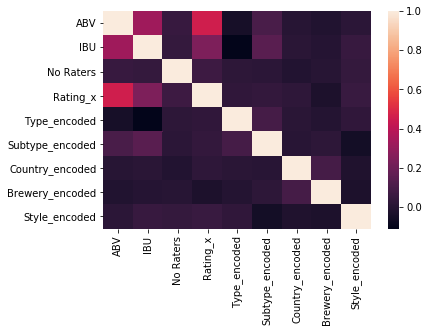

In [28]:
#let's visualise correlation
corr = set2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [80]:
#create dictionaries for encoding
enc_to_country = {}
country_to_enc = {}

enc_to_subtype = {}
subtype_to_enc  = {}

enc_to_brewery = {}
brewery_to_enc = {}

enc_to_type= {}
type_to_enc = {}

for _, r in set2[['Country', 'Country_encoded','Type','Type_encoded','Subtype','Subtype_encoded','Brewery','Brewery_encoded']].iterrows():
    enc_to_country[r['Country_encoded']] = r['Country']
    country_to_enc[r['Country']] = r['Country_encoded']
    
    enc_to_subtype[r['Subtype_encoded']] = r['Subtype']
    subtype_to_enc[r['Subtype']] = r['Subtype_encoded']
    
    enc_to_brewery[r['Brewery_encoded']] = r['Brewery']
    brewery_to_enc[r['Brewery']] = r['Brewery_encoded']
    
    enc_to_type[r['Type_encoded']] = r['Type']
    type_to_enc [r['Type']] = r['Type_encoded']

In [30]:
#how to check what the encoding corresponds to 
print(enc_to_country[10])

#and vice versa
print(country_to_enc['England'])

Bermuda
36


In [31]:
set2 = set2.dropna()

In [39]:
set2['Rating_class_alternative'] = set2['Rating_x'].apply(lambda x:int(x))

In [40]:
#prepare X and Y to then create train and test data
X = set2[['ABV','IBU','Type_encoded','Brewery_encoded','Country_encoded']]
y = set2['Rating_class_alternative']

In [41]:
# split data into training and testing sets nice and early
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3,
                                                    shuffle=True)

In [45]:
 from sklearn.neighbors import KNeighborsClassifier

In [53]:
#test how many neighbours we might need
n=range(1,15)
for i in n:
    classifier = KNeighborsClassifier(n_neighbors=i) # check the best value for n_neighbors + plot
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i," Number of neighbours - Model accuracy:", round(accuracy*100),'%')

1  Number of neighbours - Model accuracy: 85.0 %
2  Number of neighbours - Model accuracy: 86.0 %
3  Number of neighbours - Model accuracy: 88.0 %
4  Number of neighbours - Model accuracy: 88.0 %
5  Number of neighbours - Model accuracy: 88.0 %
6  Number of neighbours - Model accuracy: 88.0 %
7  Number of neighbours - Model accuracy: 88.0 %
8  Number of neighbours - Model accuracy: 89.0 %
9  Number of neighbours - Model accuracy: 89.0 %
10  Number of neighbours - Model accuracy: 89.0 %
11  Number of neighbours - Model accuracy: 89.0 %
12  Number of neighbours - Model accuracy: 89.0 %
13  Number of neighbours - Model accuracy: 89.0 %
14  Number of neighbours - Model accuracy: 88.0 %


In [54]:
set2.head()

,Country,Brewery,Style,Type,Subtype,ABV,IBU,No Raters,Rating_x,Type_encoded,Subtype_encoded,Country_encoded,Brewery_encoded,Style_encoded,Rating_class_alternative
0,Argentina,Juguetes Perdidos,Micro Brewery,Belgian Dubbel,,7.0,19.0,72.0,4.10,5,0,0,1032,4,4
1,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,7.0,19.0,57.0,3.93,74,0,0,1032,4,3
2,Argentina,Juguetes Perdidos,Micro Brewery,Saison / Farmhouse Ale,,11.7,25.0,60.0,3.76,74,0,0,1032,4,3
3,Argentina,Juguetes Perdidos,Micro Brewery,Porter,Baltic,9.0,25.0,52.0,3.99,65,8,0,1032,4,3
4,Argentina,Juguetes Perdidos,Micro Brewery,IPA,Belgian,6.6,66.0,47.0,4.25,41,9,0,1032,4,4


In [55]:
X_test

,ABV,IBU,Type_encoded,Brewery_encoded,Country_encoded
26924,5.7,35.0,41,1508,94
6901,4.5,9.0,38,1618,22
11713,5.2,18.0,92,1299,37
12900,7.5,28.0,65,1410,41
26663,6.5,50.0,65,428,94
1382,4.0,3.0,81,736,3
37219,9.6,65.0,84,71,126
27485,5.3,37.0,60,441,94
8079,4.5,39.0,16,608,29
22106,4.1,15.0,14,556,75


In [68]:
#let's predict what a beer with 5.5 ABV, 30 IBU, type: IPA, from brewery: Northern Monk, England
classifier.predict([[5.5,30,41,1337,36]])[0]

3

In [114]:
ABV = float(input("Insert ABV: "))
IBU = int(input('Insert IBU: '))
insert_type = str(input('Insert type (e.g.IPA): '))
brewery_name = str(input('Insert brewery: '))
country_name = str(input('Insert country: '))

prediction = classifier.predict([[ABV, IBU, type_to_enc[insert_type], brewery_to_enc[brewery_name], country_to_enc[country_name]]])

print('If ', brewery_name ,' in ',country_name,', launched a new ',insert_type,' beer, with ', ABV, '% ABV, ',IBU, ' IBU, it would receive a score of ', prediction[0], ' on Untappd')

Insert ABV: 5.5
Insert IBU: 30
Insert type (e.g.IPA): IPA
Insert brewery: Birrificio Lambrate
Insert country: Italy
If  Birrificio Lambrate  in  Italy , launched a new  IPA  beer, with  5.5 % ABV,  30  IBU, it would receive a score of  3  on Untappd
